<a href="https://colab.research.google.com/github/preetamjumech/autoencoder_from_scratch/blob/main/Preetam_Saha_Tom_vs_Jerry_Autoencoder_28_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

In [ ]:
!kaggle datasets list -s "Tom and Jerry"

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
balabaskar/tom-and-jerry-image-classification                    Tom and Jerry Image classification                435MB  2022-05-23 12:45:08            498         69  1.0              
yashagrawal300/tom-and-jerry                                     Tom and Jerry                                      45MB  2020-03-19 08:42:44            228          6  0.5882353        
siddharthm1698/tom-and-jerry-cartoon-complete-frames-collection  Tom and Jerry Cartoon Complete Frames Collection  749MB  2021-08-03 13:38:37             99         19  0.875            
yassershrief/video-classification-tutorial                       

In [ ]:
!kaggle datasets download -d "balabaskar/tom-and-jerry-image-classification"

 97% 423M/435M [00:03<00:00, 101MB/s] 
100% 435M/435M [00:04<00:00, 111MB/s]


In [ ]:
!unzip "/content/tom-and-jerry-image-classification.zip"

In [ ]:
import re, shutil

In [ ]:
try:
  os.makedirs("Train")
  os.makedirs("Train/Tom")
  os.makedirs("Train/Jerry")
except:
  pass

In [ ]:
try:
  os.makedirs("Val")
  os.makedirs("Val/Tom")
  os.makedirs("Val/Jerry")
except:
  pass

In [ ]:
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

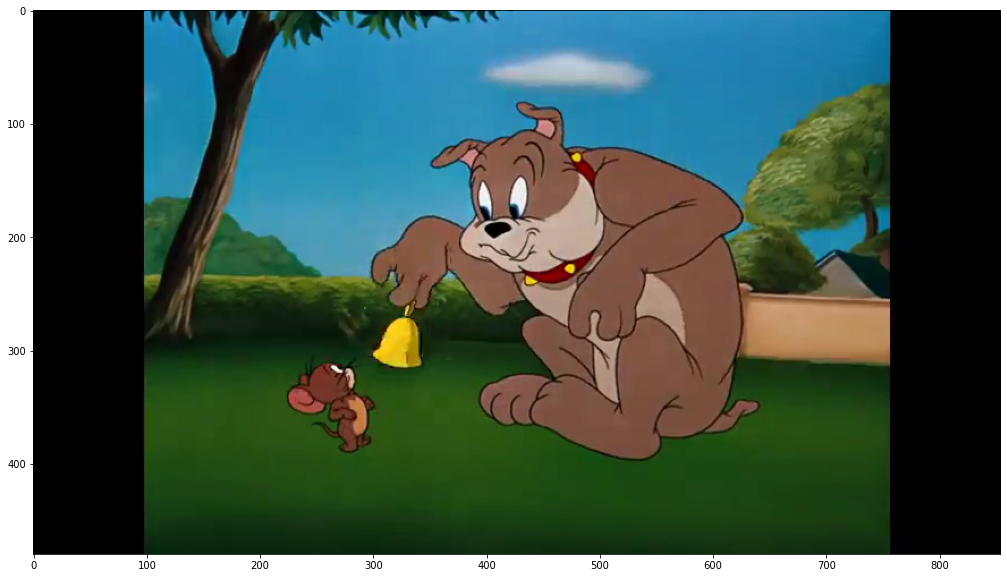

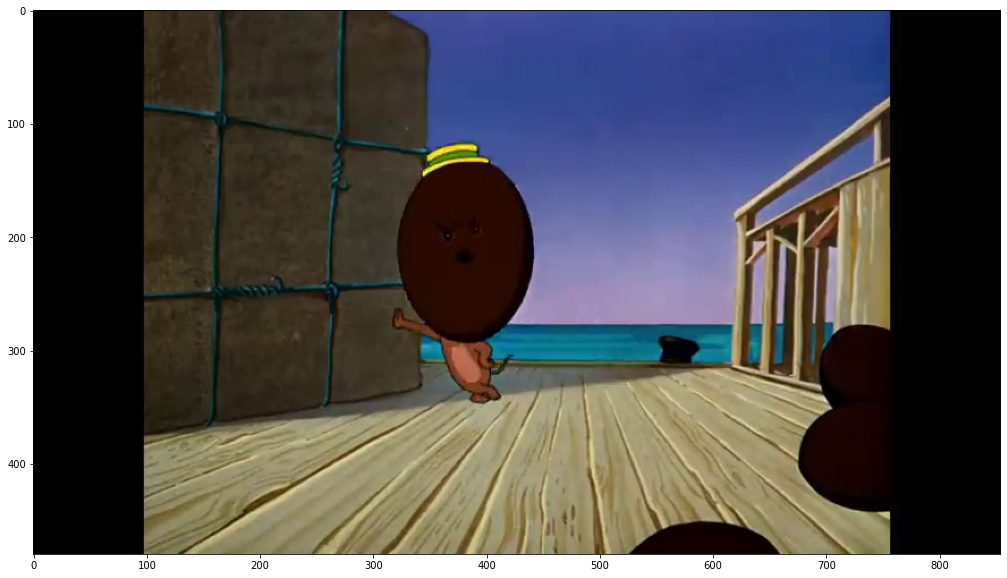

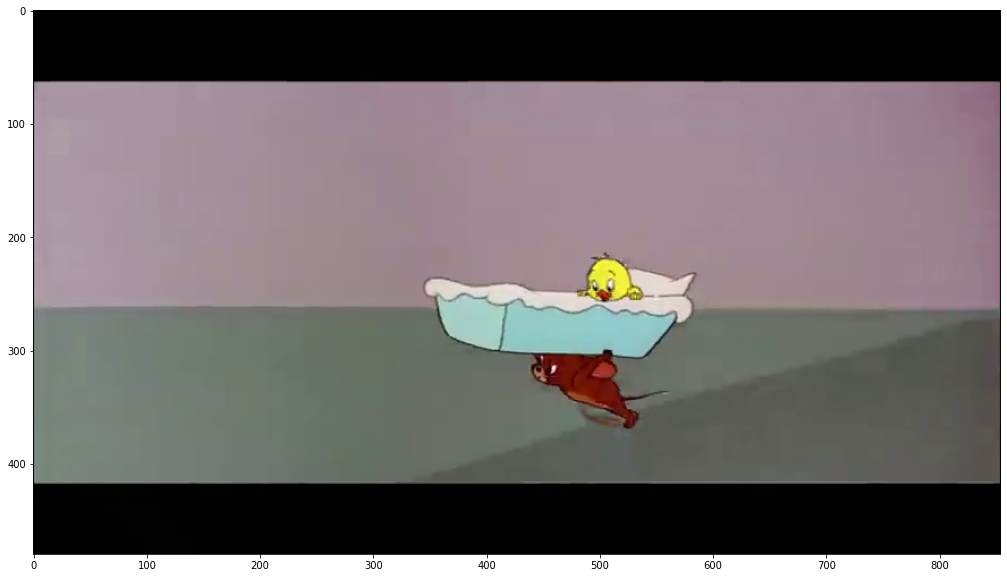

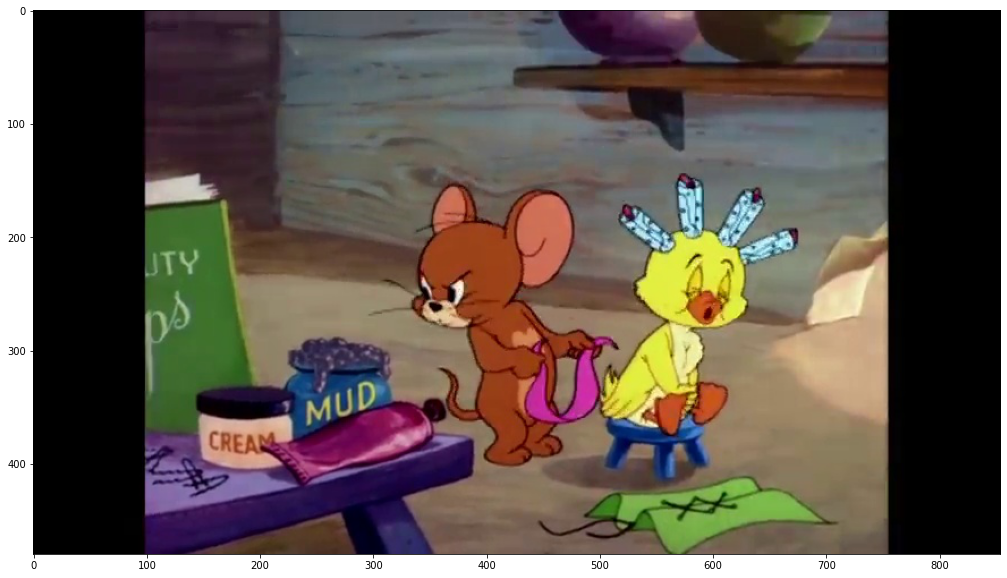

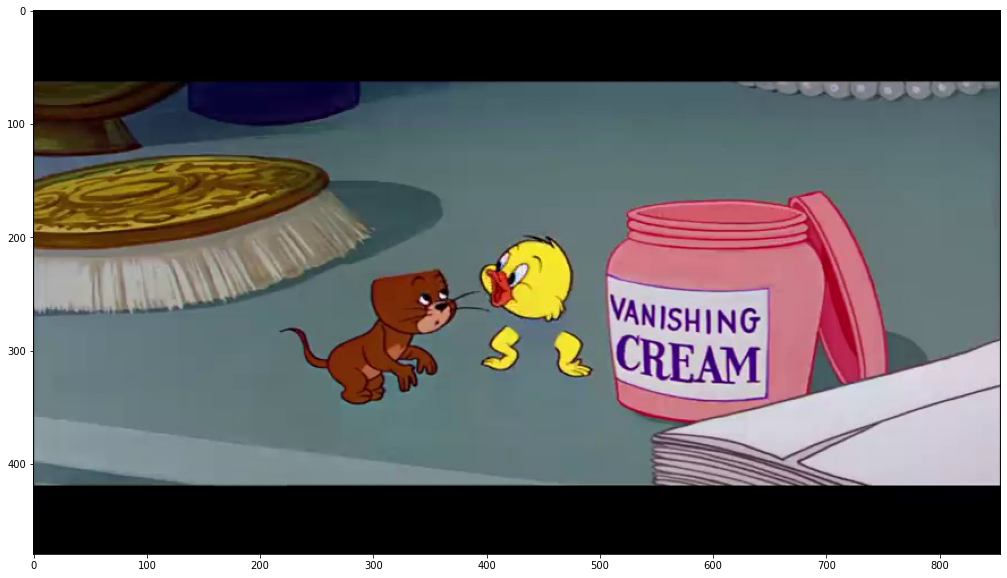

In [ ]:
for i in os.listdir("/content/tom_and_jerry/tom_and_jerry/jerry")[20:25]:
  plt.figure()
  a=Image.open(f"/content/tom_and_jerry/tom_and_jerry/jerry/{i}")
  plt.imshow(a)

In [ ]:
os.listdir("tom_and_jerry/tom_and_jerry/tom")

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/tom"))

1930

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/jerry"))

1240

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/tom_jerry_0"))

1528

In [ ]:
len(os.listdir("tom_and_jerry/tom_and_jerry/tom_jerry_1"))

780

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
transf = transforms.Compose([transforms.PILToTensor(), 
                             transforms.Resize(size=(256,256)),
                             transforms.RandomHorizontalFlip(),
                             transforms.RandomVerticalFlip()])

In [ ]:
np.random.seed(0)
tom_index = np.array(range(len(os.listdir('tom_and_jerry/tom_and_jerry/tom'))))
np.random.shuffle(tom_index)

In [ ]:
tom_index

array([ 957, 1126,  491, ..., 1653,  559,  684])

In [ ]:
len(tom_index)

1930

In [ ]:
tom_image_train = np.array(os.listdir('tom_and_jerry/tom_and_jerry/tom'))[tom_index[:1545]]
tom_image_train

array(['frame3305.jpg', 'frame2249.jpg', 'frame1175.jpg', ...,
       'frame4176.jpg', 'frame3904.jpg', 'frame385.jpg'], dtype='<U13')

In [ ]:
tom_image_val = np.array(os.listdir('tom_and_jerry/tom_and_jerry/tom'))[tom_index[1545:]]
tom_image_val

In [ ]:
np.random.seed(0)
jerry_index = np.array(range(len(os.listdir('tom_and_jerry/tom_and_jerry/jerry'))))
np.random.shuffle(jerry_index)

In [ ]:
jerry_index

array([1030,  124,  184, ..., 1216,  559,  684])

In [ ]:
len(jerry_index)

1240

In [ ]:
jerry_image_train = np.array(os.listdir('tom_and_jerry/tom_and_jerry/jerry'))[jerry_index[:995]]
jerry_image_train

In [ ]:
jerry_image_val = np.array(os.listdir('tom_and_jerry/tom_and_jerry/jerry'))[jerry_index[995:]]
jerry_image_val

In [ ]:
for file in tom_image_train:
  shutil.copy('tom_and_jerry/tom_and_jerry/tom/'+file, 'Train/Tom/'+file)

In [ ]:
for file in tom_image_val:
  shutil.copy('tom_and_jerry/tom_and_jerry/tom/'+file, 'Val/Tom/'+file)

In [ ]:
for file in jerry_image_train:
  shutil.copy('tom_and_jerry/tom_and_jerry/jerry/'+file, 'Train/Jerry/'+file)

In [ ]:
for file in jerry_image_val:
  shutil.copy('tom_and_jerry/tom_and_jerry/jerry/'+file, 'Val/Jerry/'+file)

In [ ]:
train_loader = DataLoader(ImageFolder("Train",transform = transf),batch_size=32,shuffle=True)

In [ ]:
val_loader = DataLoader(ImageFolder("Val",transform = transf),batch_size=32,shuffle=True)

In [ ]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [ ]:
len(train_loader)

80

In [ ]:
for c in train_loader:
  c=i
  break

In [ ]:
c

'frame3107.jpg'

In [ ]:
print(c)

frame3107.jpg


In [ ]:
for c in train_loader:
  i=c
  break

In [ ]:
for d in val_loader:
  j=d
  break

In [ ]:
len(val_loader)

20

In [ ]:
i

[tensor([[[[  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           ...,
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0]],
 
          [[  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           ...,
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0]],
 
          [[  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           ...,
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0],
           [  0,   0,   0,  ...,   0,   0,   0]]],
 
 
         [[[ 67,  63,  63,  ...,  50,  50,  56],
         

In [ ]:
len(i)

2

In [ ]:
i[0].shape

torch.Size([32, 3, 256, 256])

In [ ]:
i[1].shape

torch.Size([32])

In [ ]:
i[0][1]

tensor([[[ 67,  63,  63,  ...,  50,  50,  56],
         [ 67,  63,  63,  ...,  50,  50,  56],
         [ 67,  63,  63,  ...,  50,  50,  56],
         ...,
         [ 67,  63,  61,  ...,  63,  64,  60],
         [ 67,  63,  61,  ...,  63,  64,  60],
         [ 67,  63,  61,  ...,  63,  64,  60]],

        [[135, 131, 131,  ..., 112, 112, 118],
         [135, 131, 131,  ..., 112, 112, 118],
         [135, 131, 131,  ..., 112, 112, 118],
         ...,
         [127, 127, 129,  ..., 126, 127, 123],
         [127, 127, 129,  ..., 126, 127, 123],
         [127, 127, 129,  ..., 126, 127, 123]],

        [[134, 130, 130,  ..., 107, 107, 113],
         [134, 130, 130,  ..., 107, 107, 113],
         [134, 130, 130,  ..., 107, 107, 113],
         ...,
         [128, 129, 128,  ..., 117, 119, 115],
         [128, 129, 128,  ..., 117, 119, 115],
         [128, 129, 128,  ..., 117, 119, 115]]], dtype=torch.uint8)

In [ ]:
len(d)

2

In [ ]:
d[0].shape

torch.Size([32, 3, 256, 256])

In [ ]:
d[0][1].shape

torch.Size([3, 256, 256])

In [ ]:
i[0][1].shape

torch.Size([3, 256, 256])

In [ ]:
i[0][20].shape

torch.Size([3, 256, 256])

In [ ]:
img_enc = i[0].reshape(-1,3*256*256)/255
img_enc

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2627, 0.2471, 0.2471,  ..., 0.4588, 0.4667, 0.4510],
        [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
encoder=nn.Sequential(nn.Linear(in_features=3*256*256,out_features=256),nn.ReLU(),
                      nn.Linear(in_features=256,out_features=128),nn.ReLU(),
                      nn.Linear(in_features=128,out_features=64),nn.ReLU(),
                      nn.Linear(in_features=64,out_features=16))

In [ ]:
decoder=nn.Sequential(nn.Linear(in_features=16,out_features=64),nn.ReLU(),
                      nn.Linear(in_features=64,out_features=128),nn.ReLU(),
                      nn.Linear(in_features=128,out_features=256),nn.ReLU(),
                      nn.Linear(in_features=256,out_features=3*256*256))

In [ ]:
autoencoder=nn.Sequential(encoder,decoder)

In [ ]:
train_loader_auto=DataLoader(TensorDataset(img_enc.float()),batch_size=5,shuffle=True)

In [ ]:
val_loader_auto=DataLoader(TensorDataset(img_enc.float()),batch_size=5,shuffle=True)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [ ]:
epochs=10
autoencoder = autoencoder.to(device)
opt = Adam(autoencoder.parameters())

In [ ]:
def training(model,train_loader,opt,epoch):
  training_loss = 0.0

#training portion
  for batch in train_loader: #not building any classification model, so input = ouput
    batch = batch[0]
    batch = batch.to(device)
    target = batch.to(device)

    opt.zero_grad()
    train_output = model(batch)
    train_loss = F.mse_loss(train_output,target)
    train_loss.backward()
    opt.step()
    training_loss += train_loss.item()

  if (epoch+1) %  2 ==0:
    print(f"Train loss: {training_loss}")

  return (training_loss)

In [ ]:
losses=[]
for epoch in range(epochs):
  losses.append(training(model=autoencoder,train_loader=train_loader_auto,opt=opt,epoch=epoch))#epoch is only for printing the losses

Train loss: 0.46196456998586655
Train loss: 0.3543919771909714
Train loss: 0.3203168623149395
Train loss: 0.2705146986991167
Train loss: 0.25033710710704327


In [ ]:
idx = 20
img_arbit = d[0][idx]

In [ ]:
img_arbit.shape

torch.Size([3, 256, 256])

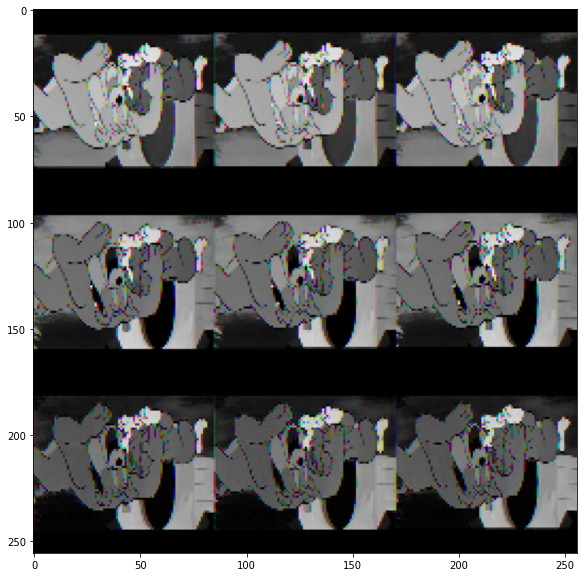

In [ ]:
plt.imshow(img_arbit.numpy().reshape(256,256,3))

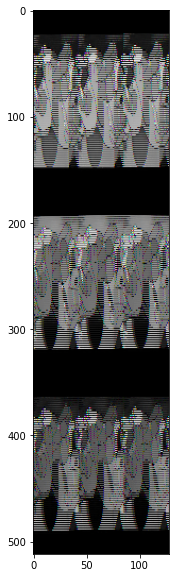

In [ ]:
plt.imshow(img_arbit.numpy().reshape(512,128,3))